In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from datetime import date


In [4]:
from mod_my_utils.read_write_data import get_price_yahoo
from mod_macd_utils.macd import get_macd_signal_line
# from mod_macd_utils.macd import get_signal_macd, get_signal_macd_signalline, plot_macd_buy_sell


### Read Data

In [5]:
symbol = 'HDFC.NS'
data_source = 'yahoo'
start_date = date(2020, 1, 1)
end_date = date.today()
print(start_date)
print(end_date)

2020-01-01
2021-12-11


In [6]:
stock_data = get_price_yahoo(symbol= symbol, data_source= data_source, start_date= start_date, end_date= end_date)
stock_data.head()

stock name:  HDFC.NS
Stock data variables:  Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
                   High          Low     Open        Close     Volume  \
Date                                                                    
2020-01-01  2438.500000  2409.000000  2418.00  2433.949951   945874.0   
2020-01-02  2472.750000  2422.000000  2430.00  2466.399902  1701396.0   
2020-01-03  2466.399902  2441.800049  2455.00  2454.449951  1963923.0   
2020-01-06  2445.000000  2371.399902  2428.00  2384.100098  2656731.0   
2020-01-07  2428.800049  2380.199951  2401.25  2415.050049  3771992.0   

              Adj Close  
Date                     
2020-01-01  2359.273682  
2020-01-02  2390.728027  
2020-01-03  2379.144531  
2020-01-06  2310.953125  
2020-01-07  2340.953369  


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,2438.500000,2409.000000,2418.00,2433.949951,945874.0,2359.273682
2020-01-02,2472.750000,2422.000000,2430.00,2466.399902,1701396.0,2390.728027
2020-01-03,2466.399902,2441.800049,2455.00,2454.449951,1963923.0,2379.144531
2020-01-06,2445.000000,2371.399902,2428.00,2384.100098,2656731.0,2310.953125
2020-01-07,2428.800049,2380.199951,2401.25,2415.050049,3771992.0,2340.953369


<AxesSubplot:xlabel='Date'>

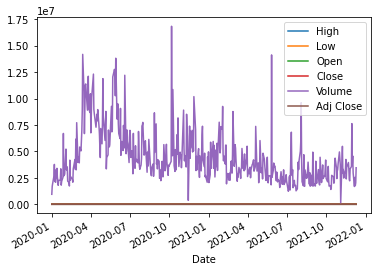

In [7]:
stock_data.plot()

### Extracting Adj close price

In [8]:
data = stock_data[["Adj Close"]].copy() 
data.columns = ['price']
data.head()

,price
Date,
2020-01-01,2359.273682
2020-01-02,2390.728027
2020-01-03,2379.144531
2020-01-06,2310.953125
2020-01-07,2340.953369


### MACD

In [10]:
short_window = 40
long_window = 100
signal_window = 20

In [11]:
macd_signal_line = get_macd_signal_line(data, short_window=short_window, long_window=long_window, signal_window=signal_window)

In [12]:
macd_signal_line.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2020-01-01,2359.273682,NaN,NaN,NaN,NaN
2020-01-02,2390.728027,NaN,NaN,NaN,NaN
2020-01-03,2379.144531,NaN,NaN,NaN,NaN
2020-01-06,2310.953125,NaN,NaN,NaN,NaN
2020-01-07,2340.953369,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

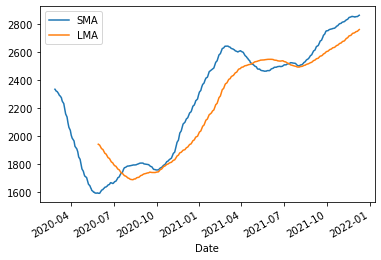

In [14]:
macd_signal_line[['SMA', 'LMA']].plot()

<AxesSubplot:xlabel='Date'>

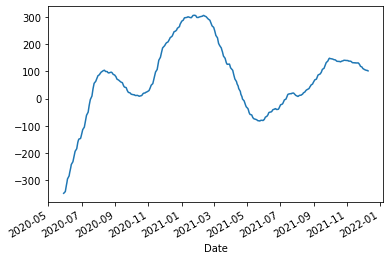

In [15]:
macd_signal_line.MACD.plot()

In [ ]:
- macd = sma - lma

In [ ]:
- sma cross lma from top, sell signal
- macd cross zero line from top, sell signal

In [ ]:
np.where (sma > lma, 1. , 0)
diff

In [ ]:
np.where(macd > 0, 1 ,0)

In [ ]:
macd_signal_line.signal_line

<AxesSubplot:xlabel='Date'>

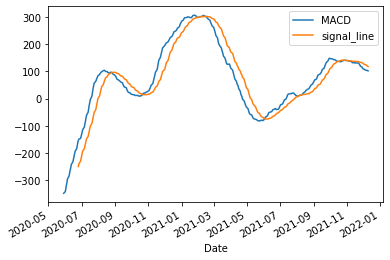

In [16]:
macd_signal_line[["MACD", "signal_line"]].plot()

In [ ]:
np.where (MACD - Signalline > 0, 1, 0)

In [ ]:
signals = macd_signal_line.copy()

In [17]:
    signals = pd.DataFrame(index = macd_signal_line.index)
    signals['price'] = macd_signal_line['price']
    signals['buy_sell'] = 0.0
    signals['buy_sell'][long_window:] = np.where((macd_signal_line.MACD)[long_window:] 
                                            > 0, 1.0, 0.0)  
    signals['buy_sell'] = signals['buy_sell'].diff()
    # return buy and sell signal

In [18]:
signals.head()

,price,buy_sell
Date,,
2020-01-01,2359.273682,NaN
2020-01-02,2390.728027,0.0
2020-01-03,2379.144531,0.0
2020-01-06,2310.953125,0.0
2020-01-07,2340.953369,0.0


### Develop macd signal with macd crossover with zero line

In [19]:
def get_signal_macd_crossover(macd_signal_line, long_window):
    """
    Input: data frame with short and long moving average
    output: Trading signal from cross over of long and short moving average
    Buy Signal = 1, Sell Signal = -1, Do nothing = 0
    """
    signals = pd.DataFrame(index = macd_signal_line.index)
    signals['price'] = macd_signal_line['price']
    signals['buy_sell'] = 0.0
    signals['buy_sell'][long_window:] = np.where((macd_signal_line.MACD)[long_window:] 
                                            > 0, 1.0, 0.0)  
    signals['buy_sell'] = signals['buy_sell'].diff()
    # return buy and sell signal
    return signals

In [20]:
macd_signal = get_signal_macd_crossover(macd_signal_line, long_window)

In [21]:
macd_signal.head()

,price,buy_sell
Date,,
2020-01-01,2359.273682,NaN
2020-01-02,2390.728027,0.0
2020-01-03,2379.144531,0.0
2020-01-06,2310.953125,0.0
2020-01-07,2340.953369,0.0


In [23]:
signals = pd.DataFrame(index = macd_signal_line.index)
signals['signal'] = 0.0
#     signals['signal'][long_window:] = np.where((data.SMA)[long_window:] 
#                                             > data.LMA[long_window:], 1.0, 0.0)  
#     signals['buy_sell_signal'] = signals['signal'].diff()
#     # return buy and sell signal
#     return signals[['buy_sell_signal']]

In [24]:
signals.head()

,signal
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-06,0.0
2020-01-07,0.0


<AxesSubplot:xlabel='Date'>

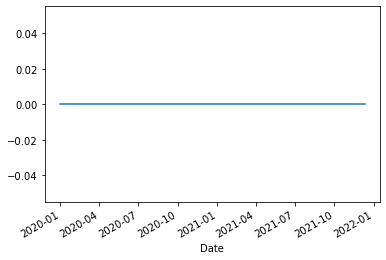

In [25]:
signals.signal.plot()

In [30]:
signals['signal'][long_window:] = np.where((macd_signal_line.MACD)[long_window:] > 0, 1.0, 0.0)  

<AxesSubplot:xlabel='Date'>

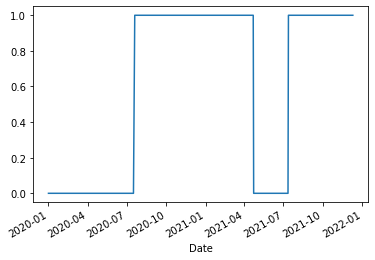

In [27]:
signals.signal.plot()

<AxesSubplot:xlabel='Date'>

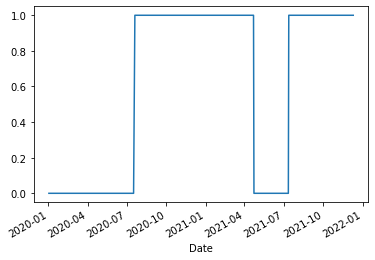

In [31]:
signals.buy_sell.cumsum().plot()

<AxesSubplot:xlabel='Date'>

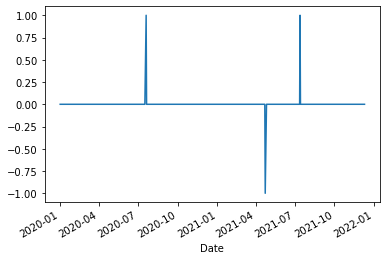

In [28]:
signals['buy_sell'] = signals['signal'].diff()
signals.buy_sell.plot()

In [ ]:
signals.buy_sell.cumsum().plot

<AxesSubplot:xlabel='Date'>

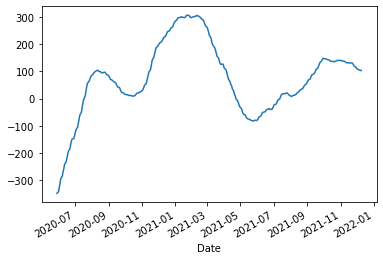

In [29]:
macd_signal_line.MACD.plot()

<AxesSubplot:xlabel='Date'>

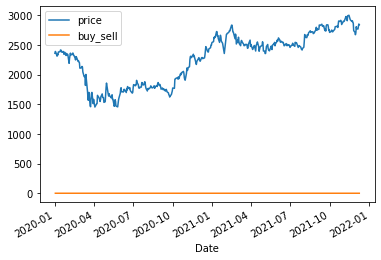

In [30]:
macd_signal.plot()

In [31]:
macd_signal_line.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2020-01-01,2359.273438,NaN,NaN,NaN,NaN
2020-01-02,2390.727783,NaN,NaN,NaN,NaN
2020-01-03,2379.144531,NaN,NaN,NaN,NaN
2020-01-06,2310.953125,NaN,NaN,NaN,NaN
2020-01-07,2340.953369,NaN,NaN,NaN,NaN


In [24]:
### MACD signals with macd and signal line cross over

In [32]:
def get_signal_macd_signalline(macd_signal_line, long_window):
    """
    Input: data frame with macd values and macd signal line
    output: Trading signal from cross over of macd and macd signal line
    Buy Signal = 1, Sell Signal = -1, Do nothing = 0
    """
    signals = pd.DataFrame(index=macd_signal_line.index)
    signals['price'] = macd_signal_line['price']
    signals['buy_sell'] = 0.0
    signals['buy_sell'][long_window:] = np.where((macd_signal_line.MACD)[long_window:] 
                                            > macd_signal_line.signal_line[long_window:], 1.0, 0.0)  
    signals['buy_sell'] = signals['buy_sell'].diff()
    # return buy and sell signal
    return signals


In [33]:
macd_signal1 = get_signal_macd_signalline(macd_signal_line, long_window)

<AxesSubplot:xlabel='Date'>

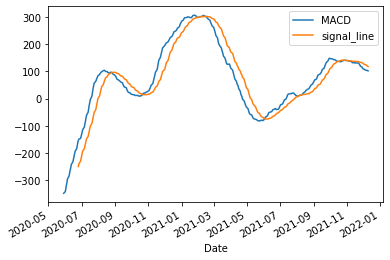

In [35]:
macd_signal_line[['MACD', 'signal_line']].plot()

<AxesSubplot:xlabel='Date'>

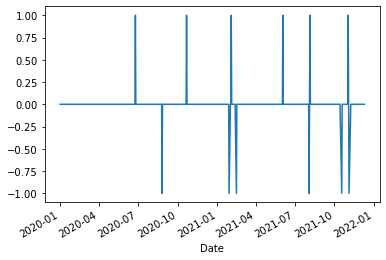

In [34]:
macd_signal1.buy_sell.plot()

<AxesSubplot:xlabel='Date'>

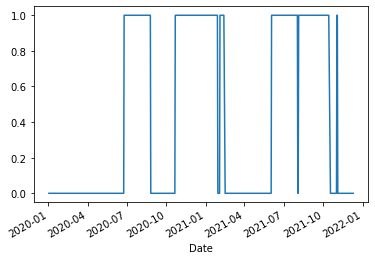

In [38]:
macd_signal1.buy_sell.cumsum().plot()

In [36]:
macd_signal_line.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2020-01-01,2359.273438,NaN,NaN,NaN,NaN
2020-01-02,2390.727783,NaN,NaN,NaN,NaN
2020-01-03,2379.144531,NaN,NaN,NaN,NaN
2020-01-06,2310.953125,NaN,NaN,NaN,NaN
2020-01-07,2340.953369,NaN,NaN,NaN,NaN


In [39]:
macd_signal1.head()

,price,buy_sell
Date,,
2020-01-01,2359.273682,NaN
2020-01-02,2390.728027,0.0
2020-01-03,2379.144531,0.0
2020-01-06,2310.953125,0.0
2020-01-07,2340.953369,0.0


In [40]:
macd_signal.head()

,price,buy_sell
Date,,
2020-01-01,2359.273682,NaN
2020-01-02,2390.728027,0.0
2020-01-03,2379.144531,0.0
2020-01-06,2310.953125,0.0
2020-01-07,2340.953369,0.0


In [41]:
def plot_macd_buy_sell(macd_signal_line, signals, symbol):
    """
    Plot for macd price, shortma, longma, buy signal, sell signal
    Input: data frame with all above information
    Output: None
    """
    # putting all above together
    fig = plt.figure(figsize=(12,8))
    plt.title(symbol)
    #fig1
    ax1 = fig.add_subplot(411, ylabel='Price in $')
    macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
    macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
    #fig2
    ax2 = fig.add_subplot(412, ylabel = 'buy signal')
    signals['price'].plot(ax=ax2, color = 'r', lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'm')
    #fig3
    ax3 = fig.add_subplot(413, ylabel = 'sell signal')
    signals['price'].plot(ax=ax3, color = 'r', lw = 2.)
    ax3.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #fig4
    ax4 = fig.add_subplot(414, ylabel='buy sell signal')
    signals['price'].plot(ax=ax4, color = 'r', lw = 2.)
    # add buy sell
    ax4.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'g')
    ax4.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #
    plt.show()

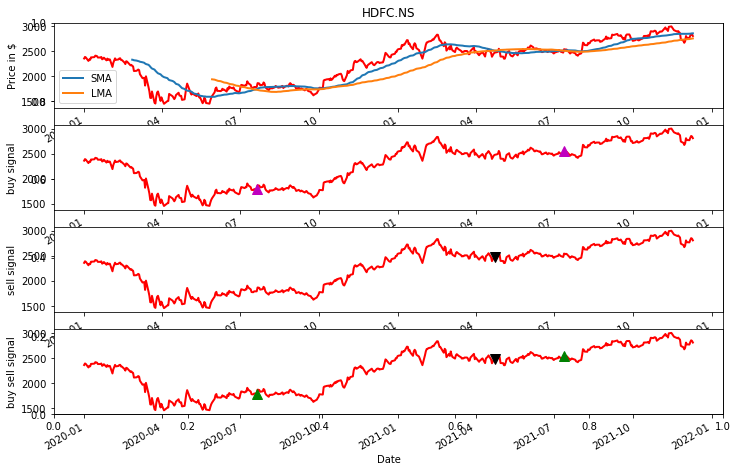

In [42]:
plot_macd_buy_sell(macd_signal_line, macd_signal, symbol=symbol)

In [43]:
from mod_my_utils.signal import plot_signals_buy_sell

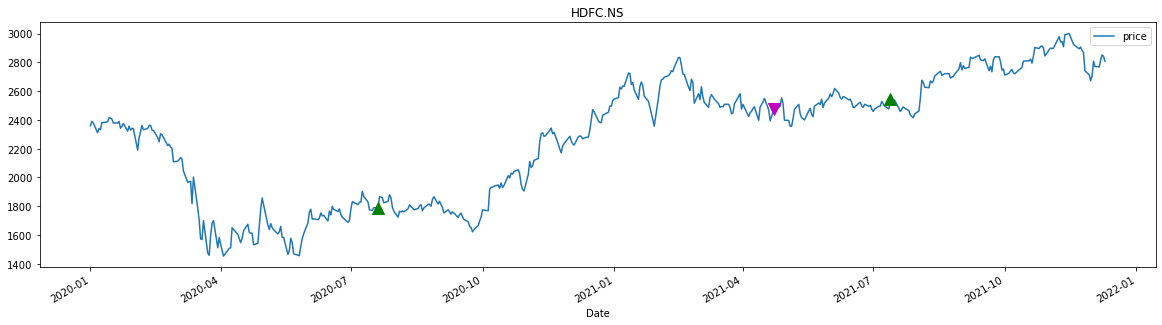

In [44]:
plot_signals_buy_sell(signals= macd_signal, symbol= symbol)